In [1]:
import pandas as pd

df_num_houses = pd.read_csv('data/timed_data-NumberHouses.csv', delimiter=';')
df_population = pd.read_csv('data/timed_data-Population.csv', delimiter=';')

df_num_houses.head()

,NbName,NumberHouses|2008,NumberHouses|2009,NumberHouses|2010,NumberHouses|2011,NumberHouses|2012,NumberHouses|2013,NumberHouses|2014,NumberHouses|2015,NumberHouses|2016,NumberHouses|2017,NumberHouses|2018,NumberHouses|2019,NumberHouses|2020,NumberHouses|2021
0,Achtse Barrier-Gunterslaer,1584,1584,1584,1583,1583,1584,1584,1587,1587.0,1587.0,1588.0,1587.0,1587.0,1587.0
1,Achtse Barrier-Hoeven,1689,1689,1740,1740,1740,1740,1740,1740,1740.0,1740.0,1740.0,1740.0,1740.0,1741.0
2,Achtse Barrier-Spaaihoef,1885,1886,1886,1886,1885,1886,1886,1886,1886.0,1886.0,1886.0,1886.0,1886.0,1886.0
3,Barrier,808,848,851,855,855,858,852,890,891.0,891.0,892.0,896.0,896.0,897.0
4,BeA2,10,10,10,10,10,10,9,9,8.0,8.0,7.0,7.0,7.0,7.0


In [2]:
df_population.head()

,NbName,Population|2008,Population|2009,Population|2010,Population|2011,Population|2012,Population|2013,Population|2014,Population|2015,Population|2016,Population|2017,Population|2018,Population|2019,Population|2020,Population|2021
0,Achtse Barrier-Gunterslaer,3932,3901,3880,3879,3846,3803,3788,3767,3737,3754,3728,3737,3721,3711
1,Achtse Barrier-Hoeven,4341,4304,4260,4194,4209,4163,4111,4070,4087,4048,4013,4005,3989,3936
2,Achtse Barrier-Spaaihoef,4874,4818,4755,4731,4719,4685,4663,4653,4603,4549,4554,4517,4505,4474
3,Barrier,1948,2154,2129,2168,2181,2179,2190,2250,2252,2195,2168,2143,2130,2077
4,BeA2,52,40,50,260,42,37,35,32,29,31,27,30,25,26


In [3]:
# Cleaning and preprocessing the data
# Renaming neighborhood column for clarity
df_num_houses.rename(columns={'NbName': 'Neighborhood'}, inplace=True)
df_population.rename(columns={'NbName': 'Neighborhood'}, inplace=True)

# Melting the datasets to reshape them from wide to long format
houses_long = df_num_houses.melt(id_vars='Neighborhood', var_name='Year', value_name='NumberHouses')
population_long = df_population.melt(id_vars='Neighborhood', var_name='Year', value_name='Population')

# Extracting year from the 'Year' column (currently in format "NumberHouses|Year" or "Population|Year")
houses_long['Year'] = houses_long['Year'].str.extract('(\d+)', expand=False)
population_long['Year'] = population_long['Year'].str.extract('(\d+)', expand=False)

# Converting the 'Year' column to integer
houses_long['Year'] = houses_long['Year'].astype(int)
population_long['Year'] = population_long['Year'].astype(int)

# Merging the datasets on Neighborhood and Year
merged_data = pd.merge(houses_long, population_long, on=['Neighborhood', 'Year'])

# Showing the first few rows of the merged dataset
merged_data.head()


,Neighborhood,Year,NumberHouses,Population
0,Achtse Barrier-Gunterslaer,2008,1584,3932
1,Achtse Barrier-Hoeven,2008,1689,4341
2,Achtse Barrier-Spaaihoef,2008,1885,4874
3,Barrier,2008,808,1948
4,BeA2,2008,10,52


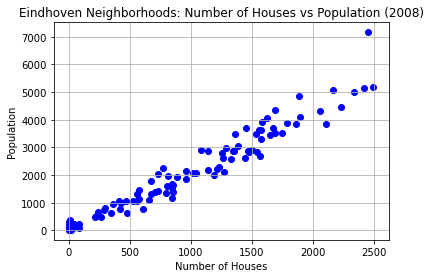

In [4]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np

# Converting 'NumberHouses' and 'Population' to numeric values for plotting
merged_data['NumberHouses'] = pd.to_numeric(merged_data['NumberHouses'], errors='coerce')
merged_data['Population'] = pd.to_numeric(merged_data['Population'], errors='coerce')

# Creating the scatter plot
fig, ax = plt.subplots()
plt.title('Eindhoven Neighborhoods: Number of Houses vs Population Over Time')
plt.xlabel('Number of Houses')
plt.ylabel('Population')

# List of years in the dataset
years = merged_data['Year'].unique()

# Function to update the scatter plot for each year
def update(year):
    ax.clear()
    year_data = merged_data[merged_data['Year'] == year]
    scatter = ax.scatter(year_data['NumberHouses'], year_data['Population'], color='blue')
    plt.title(f'Eindhoven Neighborhoods: Number of Houses vs Population ({year})')
    plt.xlabel('Number of Houses')
    plt.ylabel('Population')
    plt.grid(True)

# Creating the animation
ani = FuncAnimation(fig, update, frames=years, repeat=True, interval=1000)

# Display the animation
plt.show()
